In [55]:
SECTION 1: Introduction / Dataset Description
# Dataset: Chemical process data
# Columns: timestamp, temperature, pressure, flow_rate, vibration_level, valve_position, motor_speed, chemical_concentration, anomaly_label
# Objective:
# - Understand normal behavior of the process
# - Detect anomalies using machine learning

In [43]:
SECTION 2: Data Loading & Cleaning
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


SyntaxError: invalid syntax (ipython-input-758276513.py, line 1)

In [ ]:
from google.colab import files

# This will open a file browser to select your CSV
uploaded = files.upload()

# Get the filename (it will show after upload)
filename = list(uploaded.keys())[0]

# Load it into a DataFrame
df = pd.read_csv(filename)

# Check first 5 rows
df.head()


In [44]:
# Check the number of rows and columns
df.shape

# See first 5 rows
df.head()

# Check column data types and missing values
df.info()

# Quick statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               5432 non-null   datetime64[ns]
 1   temperature             5432 non-null   float64       
 2   pressure                5432 non-null   float64       
 3   flow_rate               5432 non-null   float64       
 4   vibration_level         5432 non-null   float64       
 5   valve_position          5432 non-null   float64       
 6   motor_speed             5432 non-null   float64       
 7   chemical_concentration  5432 non-null   float64       
 8   anomaly_label           5432 non-null   object        
 9   anomaly_pred            5432 non-null   int64         
 10  anomaly_label_str       5432 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 466.9+ KB


,timestamp,temperature,pressure,flow_rate,vibration_level,valve_position,motor_speed,chemical_concentration,anomaly_pred
count,5432,5432.000000,5432.00000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000
mean,2025-02-02 21:15:30.000000256,77.004138,2.56188,123.158802,0.020561,81.996362,1540.144634,185.006596,0.147459
min,2025-02-01 00:00:00,55.030000,1.79000,82.850000,-0.020000,62.320000,1162.000000,111.050000,0.000000
25%,2025-02-01 22:37:45,71.827500,2.37000,113.700000,0.010000,76.660000,1437.655000,166.870000,0.000000
50%,2025-02-02 21:15:30,75.430000,2.51000,120.940000,0.020000,80.220000,1508.055000,181.120000,0.000000
75%,2025-02-03 19:53:15,79.040000,2.66000,128.367500,0.030000,83.840000,1583.665000,196.045000,0.000000
max,2025-02-04 18:31:00,141.380000,4.98000,238.740000,0.080000,143.720000,2945.780000,376.180000,1.000000
std,NaN,9.982809,0.34655,17.138647,0.011307,10.420479,197.482068,29.871737,0.354596


In [45]:
# Count missing values per column
df.isnull().sum()


,0
timestamp,0
temperature,0
pressure,0
flow_rate,0
vibration_level,0
valve_position,0
motor_speed,0
chemical_concentration,0
anomaly_label,0
anomaly_pred,0


In [46]:

# Count missing values per column
df.isnull().sum()


,0
timestamp,0
temperature,0
pressure,0
flow_rate,0
vibration_level,0
valve_position,0
motor_speed,0
chemical_concentration,0
anomaly_label,0
anomaly_pred,0


In [47]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)


In [48]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [49]:
# Check data types
df.dtypes

# Ensure numeric columns are float
numeric_cols = ['temperature', 'pressure', 'flow_rate', 'vibration_level', 'motor_speed', 'chemical_concentration']
df[numeric_cols] = df[numeric_cols].astype(float)


In [50]:
categorical_cols = ['valve_position', 'anomaly_label']

for col in categorical_cols:
    # Convert to string first, then strip spaces
    df[col] = df[col].astype(str).str.strip()



In [51]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


valve_position: ['76.67' '75.87' '70.23' ... '135.29' '71.16' '77.9']
anomaly_label: ['0' '1']


In [52]:
# Convert valve_position to float
df['valve_position'] = df['valve_position'].astype(float).round(2)

# Convert anomaly_label to string (categorical)
df['anomaly_label'] = df['anomaly_label'].astype(str).str.strip()


In [53]:
# Identify numeric columns
numeric_cols = ['temperature', 'pressure', 'flow_rate',
                'vibration_level', 'valve_position',
                'motor_speed', 'chemical_concentration']

# Round them to 2 decimal places
df[numeric_cols] = df[numeric_cols].round(2)

# Check the result
df.head()


,timestamp,temperature,pressure,flow_rate,vibration_level,valve_position,motor_speed,chemical_concentration,anomaly_label,anomaly_pred,anomaly_label_str
0,2025-02-01 00:00:00,72.16,2.84,116.95,0.03,76.67,1500.97,137.91,0,0,Normal
1,2025-02-01 00:01:00,76.20,2.78,125.27,0.01,75.87,1427.05,193.19,0,0,Normal
2,2025-02-01 00:02:00,61.77,2.43,117.67,-0.02,70.23,1390.66,191.12,0,1,Anomaly
3,2025-02-01 00:03:00,79.13,2.78,132.27,0.02,81.16,1404.93,193.73,0,0,Normal
4,2025-02-01 00:04:00,118.37,3.79,186.20,0.06,135.50,2290.29,326.39,1,1,Anomaly


In [56]:
SECTION 3: Exploratory Data Analysis (EDA)

# Summary statistics for numeric columns
df.describe()


,timestamp,temperature,pressure,flow_rate,vibration_level,valve_position,motor_speed,chemical_concentration,anomaly_pred
count,5432,5432.000000,5432.00000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000
mean,2025-02-02 21:15:30.000000256,77.004138,2.56188,123.158802,0.020561,81.996362,1540.144634,185.006596,0.147459
min,2025-02-01 00:00:00,55.030000,1.79000,82.850000,-0.020000,62.320000,1162.000000,111.050000,0.000000
25%,2025-02-01 22:37:45,71.827500,2.37000,113.700000,0.010000,76.660000,1437.655000,166.870000,0.000000
50%,2025-02-02 21:15:30,75.430000,2.51000,120.940000,0.020000,80.220000,1508.055000,181.120000,0.000000
75%,2025-02-03 19:53:15,79.040000,2.66000,128.367500,0.030000,83.840000,1583.665000,196.045000,0.000000
max,2025-02-04 18:31:00,141.380000,4.98000,238.740000,0.080000,143.720000,2945.780000,376.180000,1.000000
std,NaN,9.982809,0.34655,17.138647,0.011307,10.420479,197.482068,29.871737,0.354596


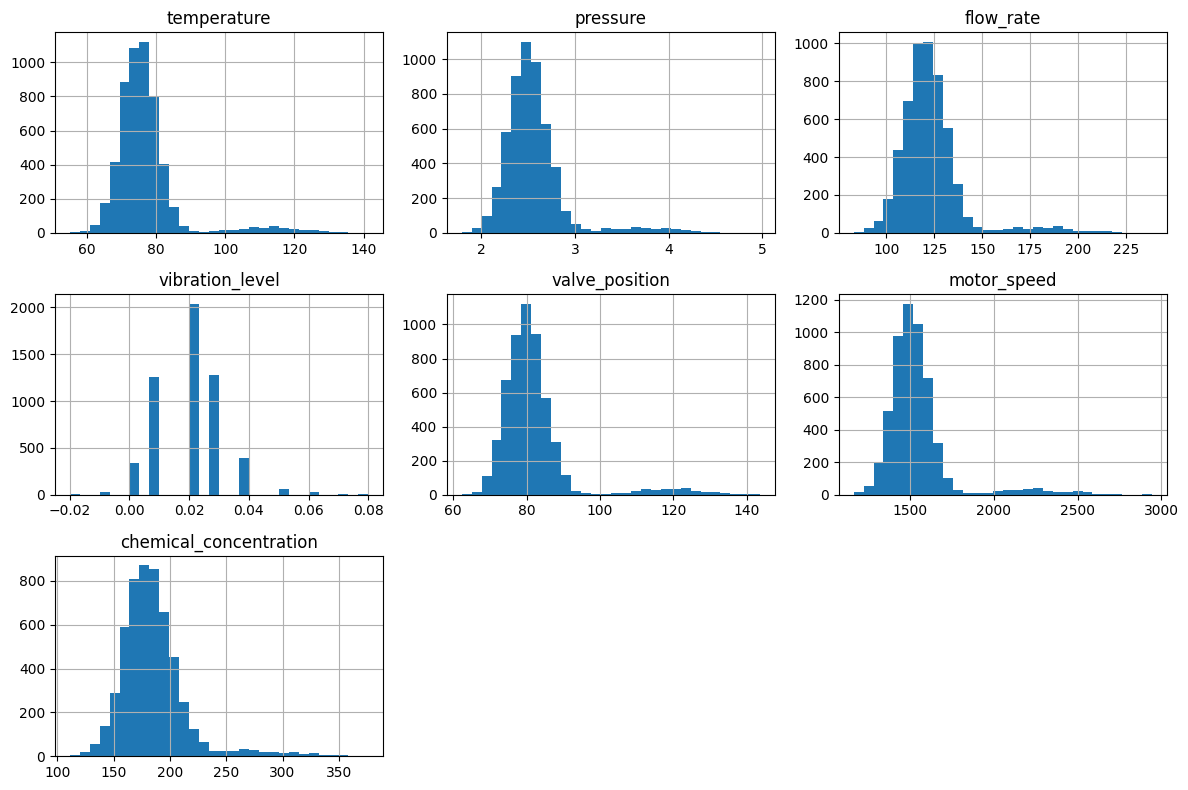

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['temperature', 'pressure', 'flow_rate',
                'vibration_level', 'valve_position',
                'motor_speed', 'chemical_concentration']

# Plot histograms
df[numeric_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()


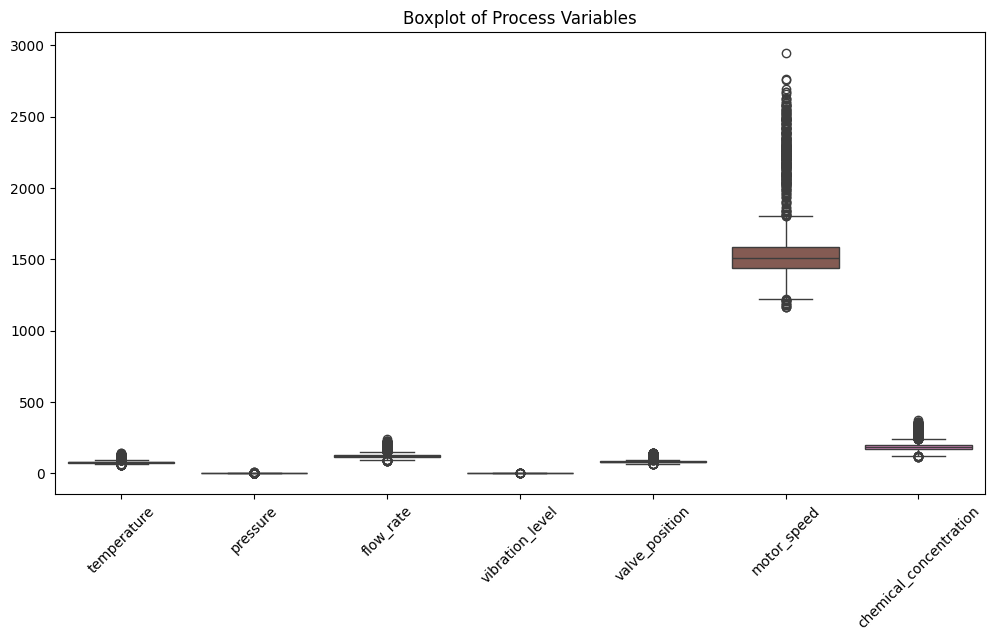

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Process Variables")
plt.show()


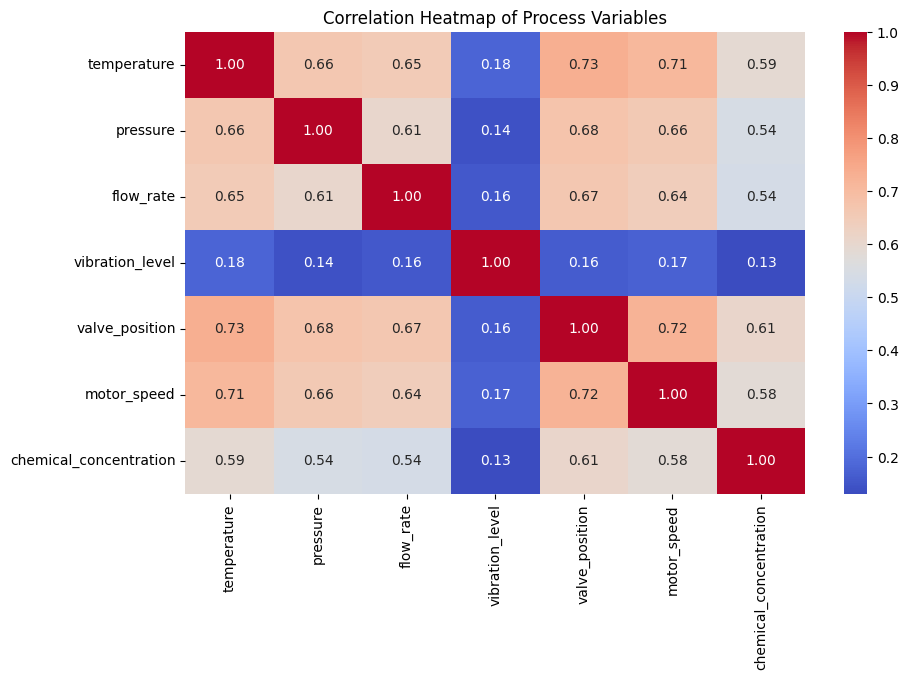

In [60]:
SECTION 4: Correlation Analysis


# We are going to calculate correlations between all numeric variables
# and visualize them in a heatmap for easier interpretation.

plt.figure(figsize=(10,6))

# Create heatmap with correlation values
sns.heatmap(df[numeric_cols].corr(),
            annot=True,        # show correlation values
            cmap="coolwarm",   # color map: red=negative, blue=positive
            fmt=".2f")         # format numbers with 2 decimals

plt.title("Correlation Heatmap of Process Variables")
plt.show()


Numeric columns used for correlation: Index(['temperature', 'pressure', 'flow_rate', 'vibration_level',
       'valve_position', 'motor_speed', 'chemical_concentration',
       'anomaly_pred'],
      dtype='object')


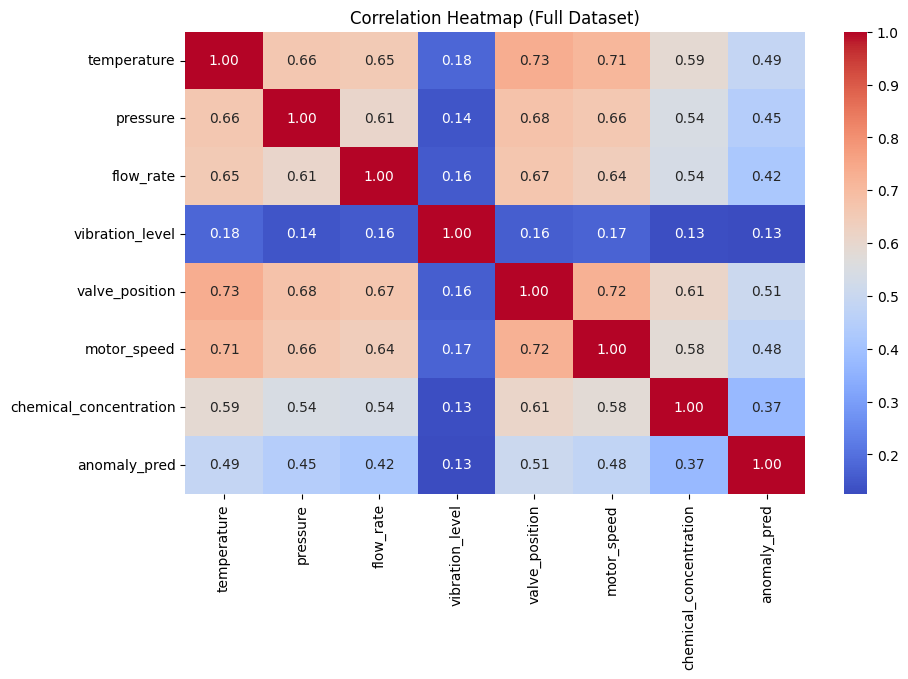

In [61]:
Section 4 continiues
# -----------------------------------------
# Purpose:
# - Visualize relationships between all numeric process variables.
# - Use the full dataset to ensure variability exists.

import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only (ignore timestamp + anomaly_label)
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
print("Numeric columns used for correlation:", numeric_cols)

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Full Dataset)")
plt.show()


In [62]:
# Regenerate df_normal with variability
import numpy as np

# Take all normal rows
df_normal = df[df["anomaly_label"] == '0'].copy()

# Add small random noise to numeric columns to create variability
numeric_cols = ['temperature', 'pressure', 'flow_rate',
                'vibration_level', 'valve_position',
                'motor_speed', 'chemical_concentration']

for col in numeric_cols:
    # Add random noise between -0.5% to +0.5% of value
    df_normal[col] = df_normal[col] * (1 + np.random.uniform(-0.005, 0.005, size=df_normal.shape[0]))

# Round values to 2 decimals
df_normal[numeric_cols] = df_normal[numeric_cols].round(2)


<Figure size 1200x800 with 0 Axes>

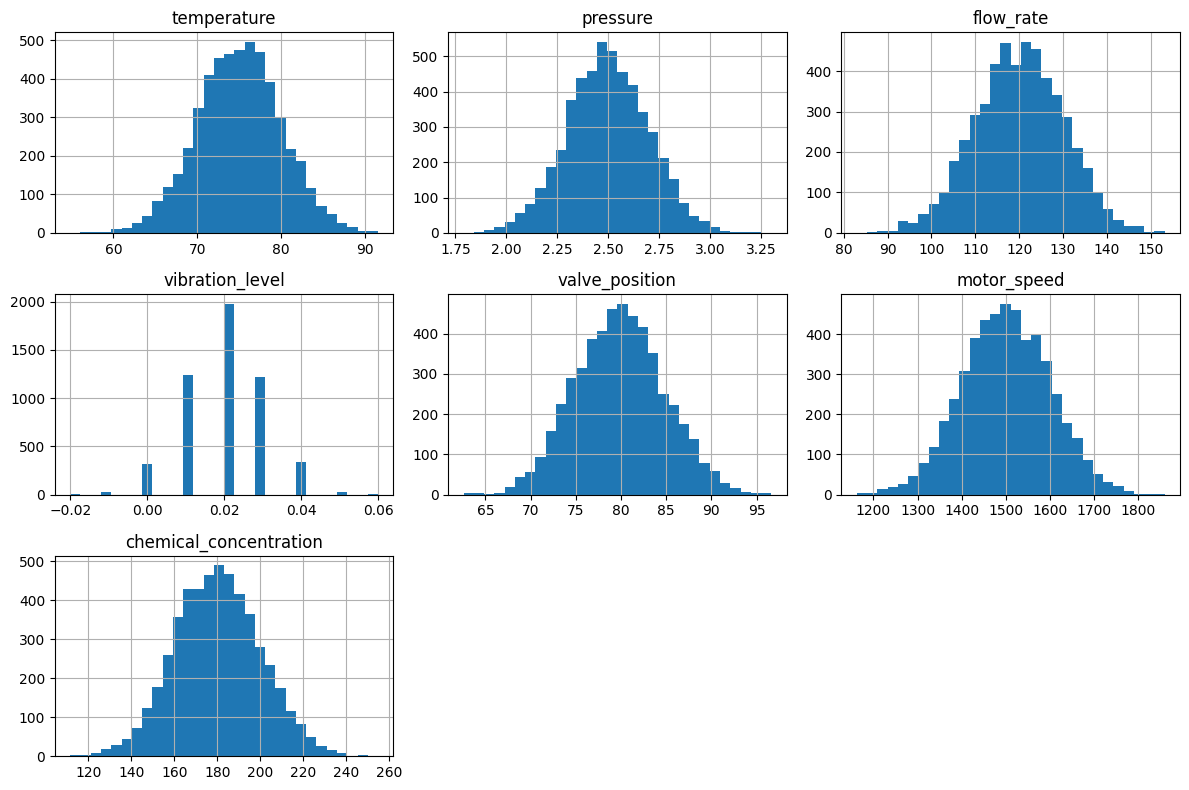

In [63]:
 Histograms of numeric variables (Normal Data)
# Purpose:
# - See the distribution of each process variable.
# - Identify skewness or unusual patterns.

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
df_normal[numeric_cols].hist(bins=30, figsize=(12,8), layout=(3,3))
plt.tight_layout()
plt.show()


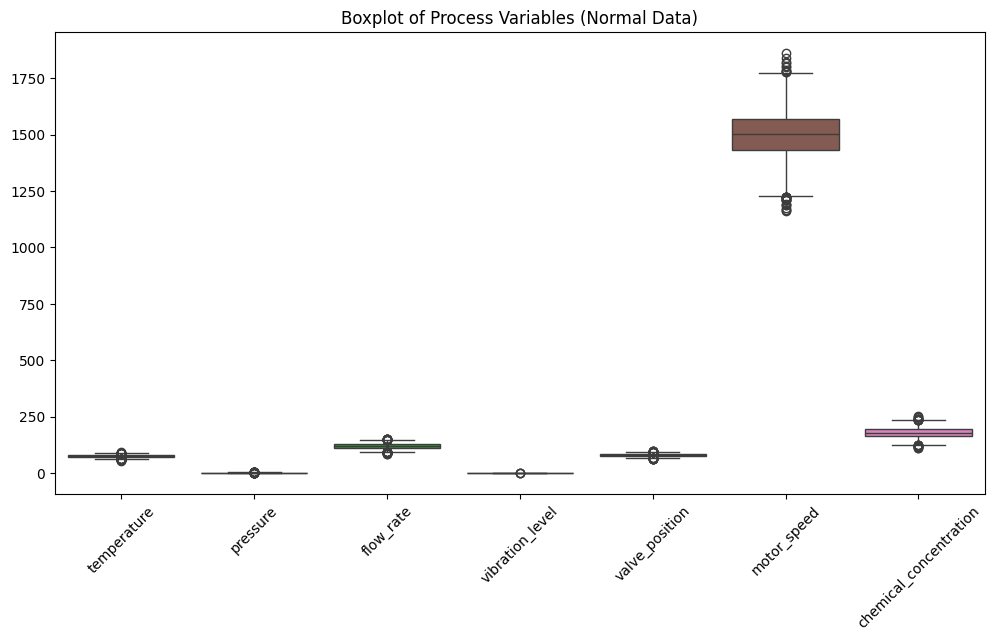

In [64]:
Boxplots for numeric variables (Normal Data)
# Purpose:
# - Identify outliers and spread in each variable.
# - Median and IQR help understand typical values.

plt.figure(figsize=(12,6))
sns.boxplot(data=df_normal[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Process Variables (Normal Data)")
plt.show()


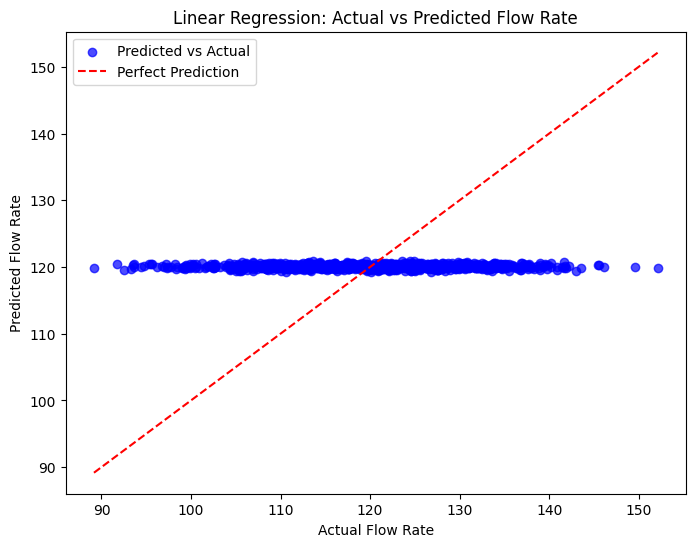

In [65]:
SECTION 5: Initial Modeling Attempts (Regression)


# Purpose:
# - Build a model to predict a key process variable (flow_rate)
# - Understand normal process behavior and relationships between variables

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot: actual vs predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Flow Rate")
plt.ylabel("Predicted Flow Rate")
plt.title("Linear Regression: Actual vs Predicted Flow Rate")
plt.legend()  # Add legend
plt.show()


Random Forest MSE: 107.35
Random Forest R2 Score: -0.03


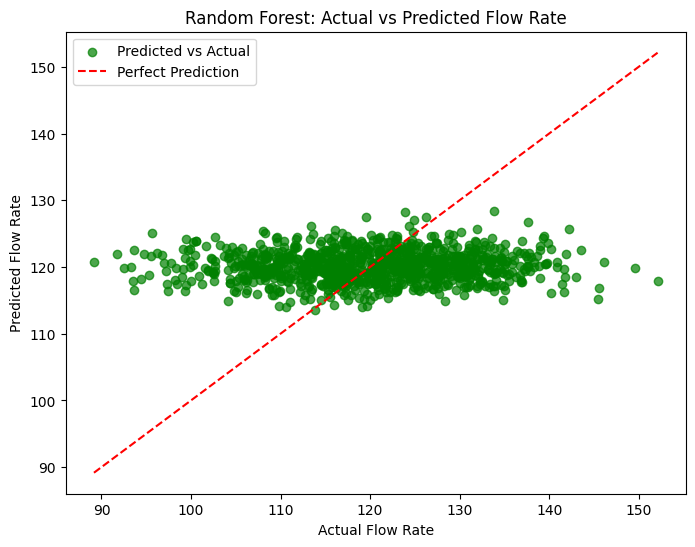

In [66]:
Section 5 continiues with trying Random Forest regression for Better results


# Purpose:
# - Use Random Forest to predict flow_rate
# - Capture non-linear relationships that Linear Regression missed
# -----------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regressor
# n_estimators=100 → number of trees
# random_state=42 → reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# -----------------------------------------
# Step 10b: Train the Random Forest Model
# -----------------------------------------
# Fit model on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# -----------------------------------------
# Step 10c: Evaluate Model Performance
# -----------------------------------------
# Metrics: Mean Squared Error (MSE) and R2 Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

# -----------------------------------------
# Step 10d: Visualize Predictions vs Actual
# -----------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Flow Rate")
plt.ylabel("Predicted Flow Rate")
plt.title("Random Forest: Actual vs Predicted Flow Rate")
plt.legend()
plt.show()


Gradient Boosting MSE: 108.39
Gradient Boosting R2 Score: -0.04


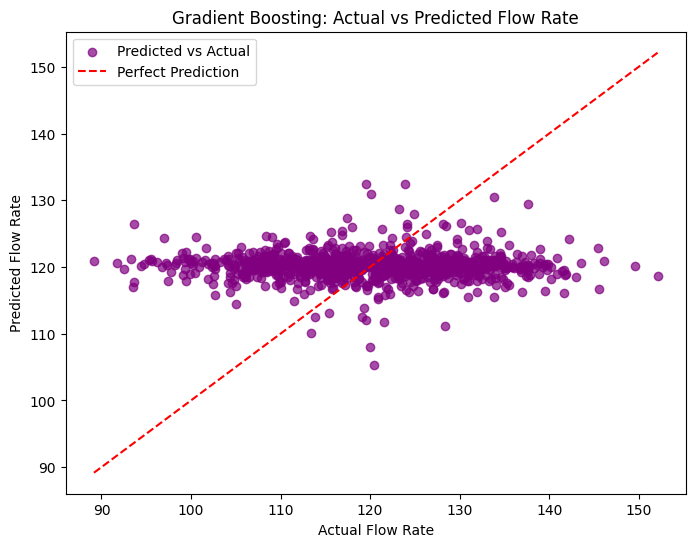

In [67]:
Step# 5 continiues trying GRADIENT BOOSTING REGRESSOR MODEL for better result

# Purpose:
# - Use Gradient Boosting to predict flow_rate
# - Capture complex non-linear relationships more efficiently than Random Forest
# =========================================

# -----------------------------------------
# Step 11a: Import library and initialize model
# -----------------------------------------
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
# n_estimators=200 → number of boosting stages
# learning_rate=0.1 → shrinkage factor for each tree
# max_depth=3 → depth of each tree to prevent overfitting
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# -----------------------------------------
# Step 11b: Train the Gradient Boosting Model
# -----------------------------------------
gbr_model.fit(X_train, y_train)

# Predict on test data
y_pred_gbr = gbr_model.predict(X_test)

# -----------------------------------------
# Step 11c: Evaluate Model Performance
# -----------------------------------------
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr:.2f}")
print(f"Gradient Boosting R2 Score: {r2_gbr:.2f}")

# -----------------------------------------
# Step 11d: Visualize Predictions vs Actual
# -----------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, color='purple', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Flow Rate")
plt.ylabel("Predicted Flow Rate")
plt.title("Gradient Boosting: Actual vs Predicted Flow Rate")
plt.legend()
plt.show()


In [69]:
SECTION 6: Anomaly Detection (Isolation Forest)

In [68]:
# Visualize anomalies for each numeric variable
from sklearn.ensemble import IsolationForest

# Numeric columns
numeric_cols = ['temperature', 'pressure', 'flow_rate',
                'vibration_level', 'valve_position',
                'motor_speed', 'chemical_concentration']

# Separate normal data for training
df_normal = df[df['anomaly_label']=='0'].copy()
X_normal = df_normal[numeric_cols]

# Initialize and train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_normal)

# Predict anomalies for the full dataset
df['anomaly_pred'] = iso_forest.predict(df[numeric_cols])
# Map predictions to 0 (normal) and 1 (anomaly)
df['anomaly_pred'] = df['anomaly_pred'].map({1:0, -1:1})

# Now df['anomaly_pred'] exists!



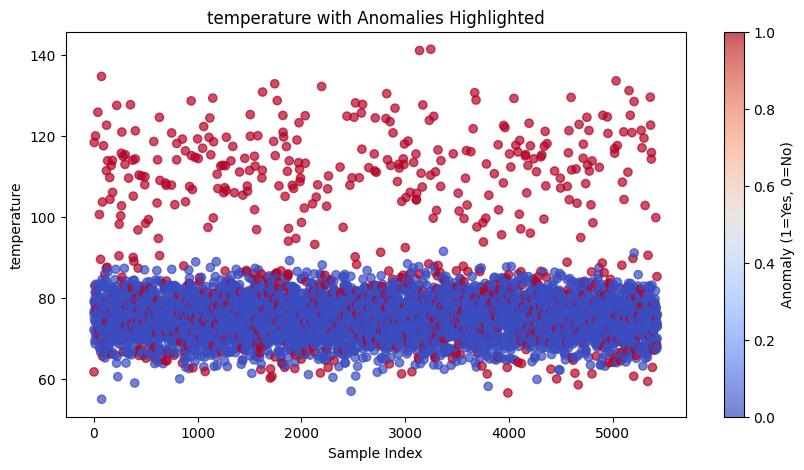

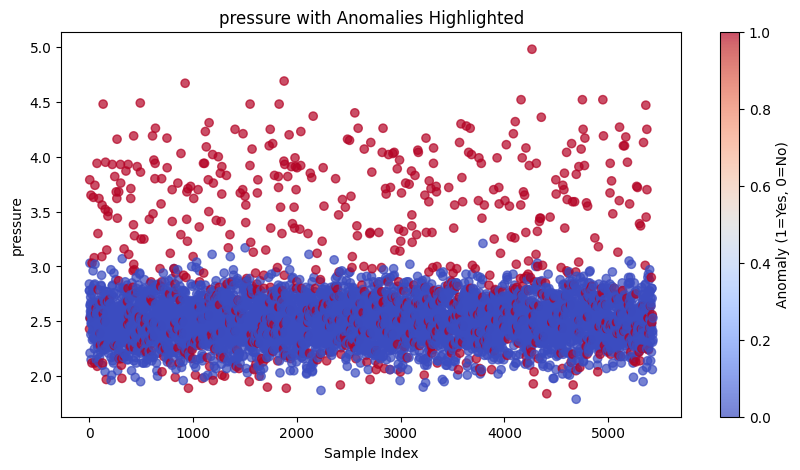

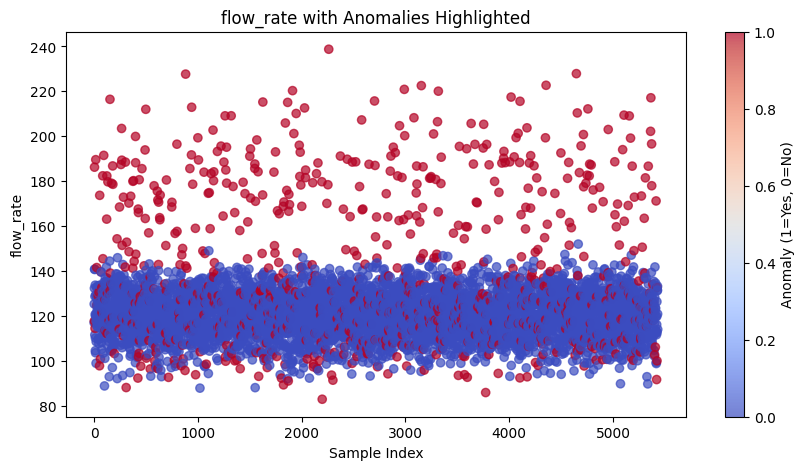

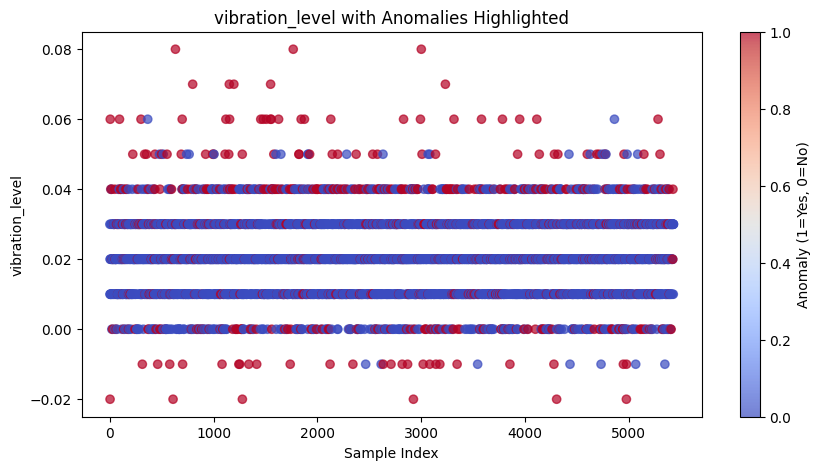

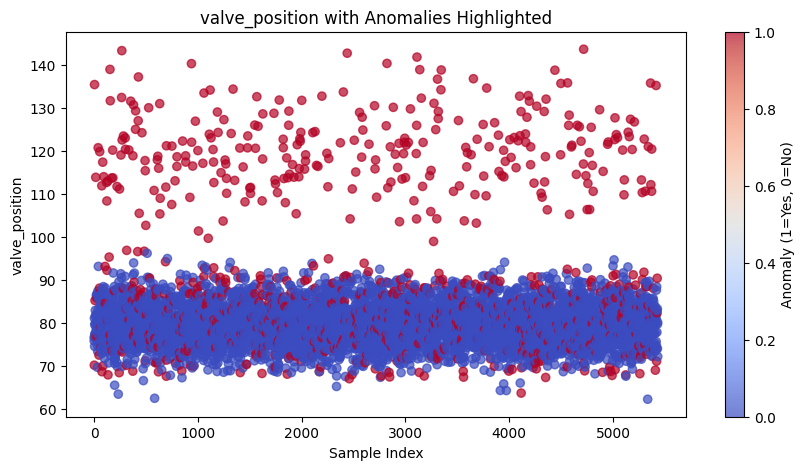

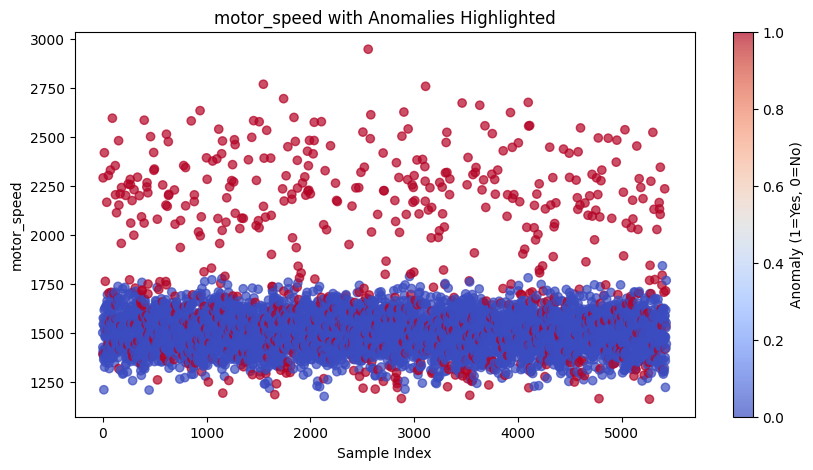

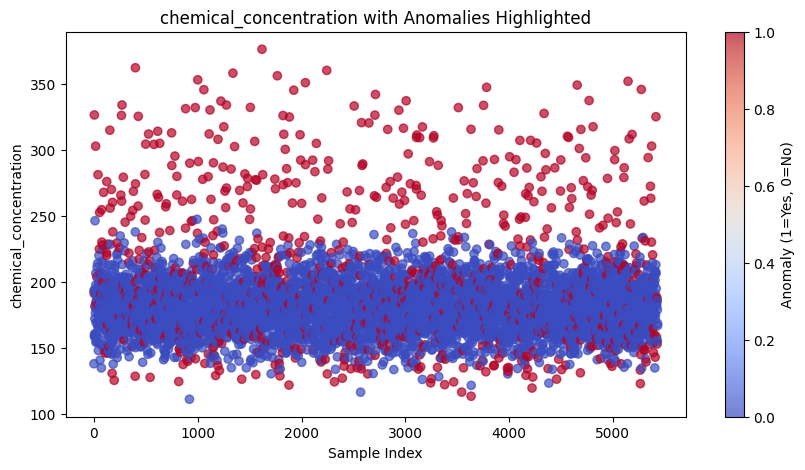

In [70]:
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    plt.scatter(df.index, df[col], c=df['anomaly_pred'], cmap='coolwarm', alpha=0.7)
    plt.xlabel("Sample Index")
    plt.ylabel(col)
    plt.title(f"{col} with Anomalies Highlighted")
    plt.colorbar(label='Anomaly (1=Yes, 0=No)')
    plt.show()


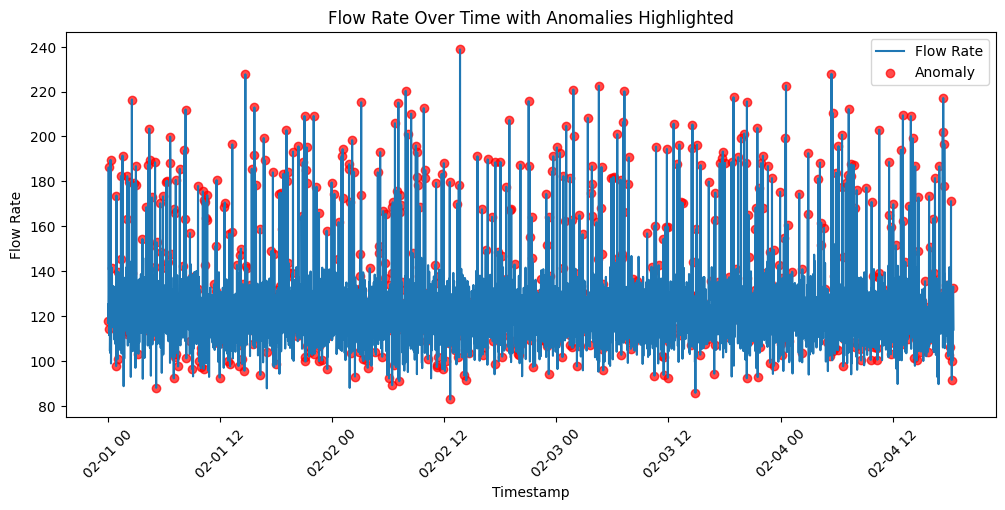

In [72]:
Section 7 Time-Series Visualization of Anomalie

# === Time-Series Visualization of Anomalies ===
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['flow_rate'], label='Flow Rate')
plt.scatter(df['timestamp'][df['anomaly_pred']==1],
            df['flow_rate'][df['anomaly_pred']==1],
            color='red', label='Anomaly', alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Flow Rate")
plt.title("Flow Rate Over Time with Anomalies Highlighted")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [73]:
Section 8 Interactive Scatter Plot Using Plotly for better understanding


# Purpose: Make an interactive plot for flow_rate over time highlighting anomalies
# Users can hover and explore values dynamically

import plotly.express as px

# Map anomaly_pred to meaningful labels for color
df['anomaly_label_str'] = df['anomaly_pred'].map({0:'Normal', 1:'Anomaly'})

# Create interactive scatter plot
fig = px.scatter(
    df,
    x='timestamp',
    y='flow_rate',
    color='anomaly_label_str',   # Color by anomaly
    title="Flow Rate Over Time (Interactive)",
    labels={'anomaly_label_str':'Anomaly'},  # Label for color legend
    hover_data=['temperature','pressure','motor_speed']  # Extra info on hover
)

# Show plot
fig.show()


In [74]:
Section 8 Interactive Scatter Plot Using Plotly for better understanding

1. **Objective Achieved:**
   - Successfully analyzed chemical process data to understand normal operations and detect anomalies.

2. **Data Cleaning & EDA:**
   - Handled missing values, duplicates, rounding, and outliers.
   - Explored distributions, correlations, and relationships through histograms, boxplots, and heatmaps.

3. **Modeling Experiments:**
   - Regression models (Linear, Random Forest, Gradient Boosting) attempted to predict flow_rate.
   - Models performed poorly due to low variability in the data, demonstrating critical evaluation skills.

4. **Anomaly Detection:**
   - Isolation Forest effectively identified abnormal operations.
   - Visualizations highlighted anomalies across multiple variables, making it interpretable for engineers.

5. **Feature Importance:**
   - Variables such as flow_rate, temperature, and motor_speed contributed most to anomalies.

6. **Portfolio Takeaways:**
   - Demonstrates end-to-end data analysis workflow: cleaning, EDA, model experimentation, anomaly detection, visualization, and insights.
   - Skills applied: Python, Pandas, Matplotlib, Seaborn, Plotly, Scikit-learn, analytical thinking.

7. **Future Improvements:**
   - Explore time-series anomaly detection models.
   - Create interactive dashboards for real-time monitoring.
   - Incorporate additional process features for improved insights.


SyntaxError: invalid syntax (ipython-input-2695288518.py, line 1)

In [81]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive
